In [118]:
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import pickle
import matplotlib.pyplot as plt
from stocks import Stocks, Ticker

In [30]:
num_topics = 50 # make this consistent with LDA file

In [13]:
stocks = Stocks()

Retrieved current S&P500 tickers ['MMM', 'AOS', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA

 50%|█████████████████████████████████████████████████▉                                                  | 251/503 [00:00<00:00, 2501.68it/s]

Setting up MMM
Setting up AOS
Setting up ABT
Setting up ABBV
Setting up ABMD
Setting up ACN
Setting up ATVI
Setting up ADM
Setting up ADBE
Setting up ADP
Setting up AAP
Setting up AES
Setting up AFL
Setting up A
Setting up APD
Setting up AKAM
Setting up ALK
Setting up ALB
Setting up ARE
Setting up ALGN
Setting up ALLE
Setting up LNT
Setting up ALL
Setting up GOOGL
Setting up GOOG
Setting up MO
Setting up AMZN
Setting up AMCR
Setting up AMD
Setting up AEE
Setting up AAL
Setting up AEP
Setting up AXP
Setting up AIG
Setting up AMT
Setting up AWK
Setting up AMP
Setting up ABC
Setting up AME
Setting up AMGN
Setting up APH
Setting up ADI
Setting up ANSS
Setting up AON
Setting up APA
Setting up AAPL
Setting up AMAT
Setting up APTV
Setting up ANET
Setting up AJG
Setting up AIZ
Setting up T
Setting up ATO
Setting up ADSK
Setting up AZO
Setting up AVB
Setting up AVY
Setting up BKR
Setting up BALL
Setting up BAC
Setting up BBWI
Setting up BAX
Setting up BDX
Setting up WRB
Setting up BRK.B
Setting

100%|███████████████████████████████████████████████████████████████████████████████████████████████████▊| 502/503 [00:00<00:00, 2499.19it/s]

Setting up ZBH
Setting up ZION


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 503/503 [00:00<00:00, 2485.75it/s]

Setting up ZTS


In [22]:
with open('tickers_and_topics.pkl', 'rb') as f:
    tickers_and_topics = pickle.load(f)
tickers_and_topics

{'CAH': [(3, 0.34416974),
  (30, 0.14602631),
  (47, 0.07745895),
  (17, 0.054704323),
  (28, 0.044807393),
  (49, 0.042931426),
  (1, 0.038357873),
  (9, 0.027757958),
  (35, 0.025157342),
  (32, 0.019986283),
  (18, 0.014496694),
  (27, 0.013228824),
  (5, 0.01294736),
  (46, 0.012692575),
  (43, 0.012449613),
  (25, 0.011493122),
  (34, 0.011277592)],
 'FLS': [(34, 0.15019295),
  (32, 0.095036276),
  (24, 0.0907074),
  (27, 0.08565929),
  (5, 0.082257345),
  (35, 0.04416172),
  (33, 0.037090052),
  (45, 0.036286242),
  (19, 0.029874165),
  (9, 0.02925373),
  (18, 0.027611796),
  (38, 0.026788602),
  (39, 0.023970364),
  (46, 0.021338165),
  (3, 0.019180253),
  (13, 0.016899727),
  (43, 0.014506145),
  (42, 0.013067774),
  (44, 0.011940041),
  (8, 0.010493707),
  (6, 0.010343652),
  (49, 0.010243269)],
 'HBAN': [(21, 0.8796873), (16, 0.1189329)],
 'TSLA': [(35, 0.38598737),
  (44, 0.24209556),
  (13, 0.13674687),
  (19, 0.03620344),
  (11, 0.03221067),
  (24, 0.021206455),
  (14, 0.0

In [28]:
usable_tickers = []
for ticker in tickers_and_topics.keys():
    if ticker in stocks.tickers and stocks.tickers[ticker].has_expected_trading_days():
        usable_tickers.append(ticker)
print(usable_tickers, len(usable_tickers))

['CAH', 'HBAN', 'EMN', 'ETN', 'VRSK', 'AWK', 'ROP', 'JNPR', 'CSX', 'LUV', 'WBA', 'JCI', 'TTWO', 'PSA', 'CMA', 'AAP', 'STZ', 'STX', 'ADP', 'PG', 'AMD', 'NEE', 'TGT', 'LDOS', 'UNH', 'MCO', 'VTRS', 'BK', 'MAA', 'TSCO', 'PFG', 'CVX', 'LUMN', 'RJF', 'LNT', 'EXR', 'DE', 'CF', 'MAS', 'LOW', 'GPC', 'ITW', 'MCK', 'EBAY', 'AON', 'BKR', 'TXT', 'BDX', 'T', 'TDY', 'JBHT', 'PPG', 'AMGN', 'SWK', 'J', 'CPB', 'MA', 'LRCX', 'DGX', 'PWR', 'SYY', 'HSIC', 'HON', 'NKE', 'AMZN', 'V', 'NTRS', 'CCI', 'CE', 'FDX', 'USB', 'XOM', 'MSFT', 'WMB', 'DPZ', 'FMC', 'BEN', 'TYL', 'UHS', 'CAT', 'KO', 'FAST', 'DXCM', 'AIZ', 'WM', 'LIN', 'HIG', 'MNST', 'A', 'SNPS', 'AMP', 'WDC', 'EQIX', 'SRE', 'INTU', 'XEL', 'SBUX', 'EMR', 'GL', 'REGN', 'VNO', 'L', 'GOOGL', 'CRL', 'RL', 'ADSK', 'ADM', 'ALB', 'MHK', 'CHRW', 'ALL', 'ESS', 'F', 'HST', 'CVS', 'PEP', 'CB', 'IT', 'SJM', 'WEC', 'PPL', 'EA', 'BMY', 'INCY', 'CINF', 'CL', 'NVDA', 'OKE', 'PKG', 'ORCL', 'MPWR', 'PNR', 'DVA', 'ANSS', 'TMO', 'PM', 'FRT', 'RF', 'AVY', 'ZION', 'HUM', 'COST

In [52]:
# Naive baseline code: assume num_topics affects all

this_ticker = "GOOG"

# Size of dataset
num_tickers = len(usable_tickers)
price_len = len(stocks.tickers["GOOG"].hist)

print("Size", size)

# Predictor variable
price = stocks.tickers["GOOG"].hist["Close"]

Size 3021


In [53]:
model = pm.Model()

with model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=30)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=num_tickers)
    sigma = pm.HalfNormal("sigma", sigma=5)

    # Expected value of outcome
    mu = alpha
    for idx, ticker in enumerate(usable_tickers[:num_tickers]):
        if ticker == this_ticker:
            pass
        mu += beta[idx] * stocks.tickers[ticker].hist["Close"]
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=price)




In [90]:
with model:
    # draw 1000 posterior samples
    idata = pm.sample(chains=1)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [alpha, beta, sigma]


Sampling 1 chain for 1_000 tune and 1_000 draw iterations (1_000 + 1_000 draws total) took 64 seconds.


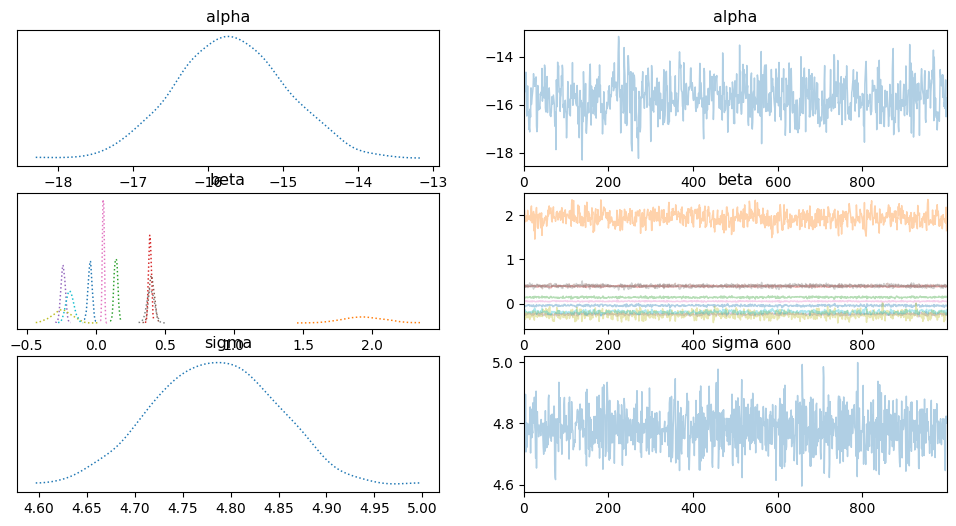

In [91]:
az.plot_trace(idata, combined=True);


In [92]:
az.summary(idata, round_to=2)


arviz - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,-15.70,0.76,-17.02,-14.24,0.04,0.03,451.62,580.88,NaN
beta[0],-0.04,0.02,-0.07,-0.01,0.00,0.00,567.88,638.44,NaN
beta[1],1.94,0.15,1.68,2.23,0.01,0.00,522.54,575.77,NaN
beta[2],0.15,0.01,0.12,0.17,0.00,0.00,685.74,793.40,NaN
beta[3],0.39,0.01,0.37,0.41,0.00,0.00,475.86,533.18,NaN
beta[4],-0.24,0.02,-0.26,-0.21,0.00,0.00,558.78,675.12,NaN
beta[5],0.40,0.02,0.37,0.44,0.00,0.00,527.64,574.96,NaN
beta[6],0.05,0.01,0.04,0.07,0.00,0.00,605.70,538.94,NaN
beta[7],0.40,0.03,0.35,0.45,0.00,0.00,544.68,737.52,NaN
beta[8],-0.24,0.07,-0.37,-0.11,0.00,0.00,747.77,605.39,NaN


In [93]:
idata


Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [115]:
sampled_alpha = idata.posterior["alpha"][0][-1].to_numpy()
sampled_betas = idata.posterior["beta"][0][-1].to_numpy()

In [116]:
predicted_price = np.ones(price_len) * sampled_alpha

for idx, ticker in enumerate(usable_tickers[:num_tickers]):
    predicted_price += sampled_betas[idx] * stocks.tickers[ticker].hist["Close"]



In [117]:
predicted_price

Date
2010-01-04 00:00:00-05:00      5.529530
2010-01-05 00:00:00-05:00      5.300745
2010-01-06 00:00:00-05:00      5.168892
2010-01-07 00:00:00-05:00      5.804893
2010-01-08 00:00:00-05:00      5.941250
                                ...    
2021-12-27 00:00:00-05:00    138.823800
2021-12-28 00:00:00-05:00    140.228175
2021-12-29 00:00:00-05:00    140.785255
2021-12-30 00:00:00-05:00    140.825044
2021-12-31 00:00:00-05:00    141.922088
Name: Close, Length: 3021, dtype: float64

In [67]:
price

Date
2010-01-04 00:00:00-05:00     15.610239
2010-01-05 00:00:00-05:00     15.541497
2010-01-06 00:00:00-05:00     15.149715
2010-01-07 00:00:00-05:00     14.797037
2010-01-08 00:00:00-05:00     14.994298
                                ...    
2021-12-27 00:00:00-05:00    148.063995
2021-12-28 00:00:00-05:00    146.447998
2021-12-29 00:00:00-05:00    146.504501
2021-12-30 00:00:00-05:00    146.002502
2021-12-31 00:00:00-05:00    144.679504
Name: Close, Length: 3021, dtype: float64

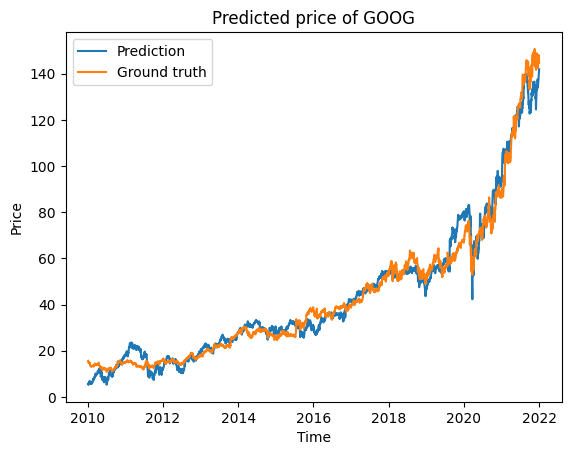

In [125]:
plt.plot(predicted_price, label="Prediction")
plt.plot(price, label="Ground truth")
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Predicted price of GOOG")
plt.legend()